In [3]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2)

# 0,0
circuit.x(0)

# 1,0
circuit.cx(0, 1)  # cnot, controlled not, flips 2nd qubit value IF first qubit is  a 1

# 1,1
circuit.measure([0, 1], [0, 1])

In [4]:

circuit.draw()

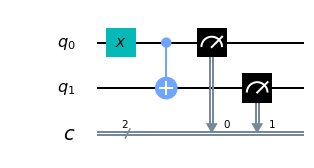

In [5]:
circuit.draw(output="mpl")

In [6]:
from qiskit import IBMQ
IBMQ.save_account(open('.env', 'r').read())

In [7]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
provider = IBMQ.get_provider('ibm-q')

In [10]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits.")

ibmq_qasm_simulator has 0 queued and simulated qubits.
ibmqx2 has 0 queued and 5 qubits.
ibmq_16_melbourne has 11 queued and 14 qubits.
ibmq_vigo has 8 queued and 5 qubits.
ibmq_ourense has 11 queued and 5 qubits.
ibmq_london has 0 queued and 5 qubits.
ibmq_burlington has 0 queued and 5 qubits.
ibmq_essex has 0 queued and 5 qubits.


In [11]:
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend("ibmq_essex")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


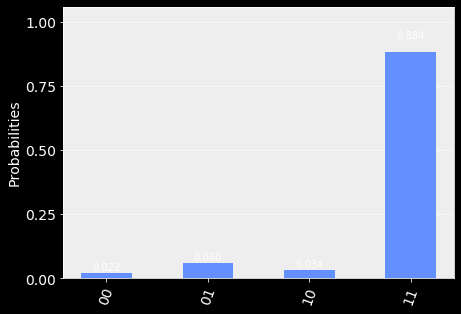

In [13]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use('dark_background')
results = job.result()
counts = results.get_counts()

plot_histogram([counts])

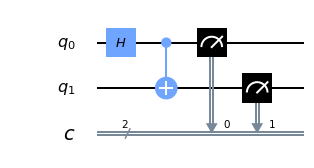

In [14]:
backend = provider.get_backend("ibmq_qasm_simulator")

circuit = q.QuantumCircuit(2, 2)

# 0,0
circuit.h(0)

# 1,0
circuit.cx(0, 1)  # cnot, controlled not, flips 2nd qubit value IF first qubit is  a 1

# 1,1
circuit.measure([0, 1], [0, 1])

circuit.draw(output="mpl")

In [15]:
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


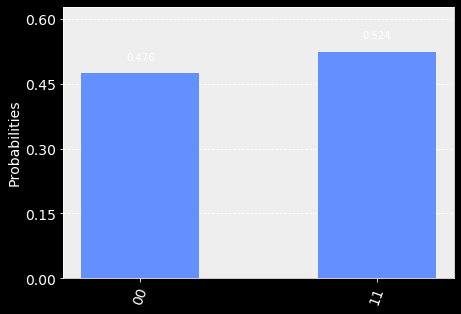

In [16]:
results = job.result()
counts = results.get_counts()

plot_histogram([counts])

In [18]:
from qiskit import Aer
sim_backend = Aer.get_backend('qasm_simulator')
for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator


In [ ]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)
results = job.result()
counts = results.get_counts()

plot_histogram([counts])